# **Predictive Analysis Of Clean Water Data In The Community**
Analisis Prediktif Data Air Bersih Di Masyarakat

Nama : Ayudha Kusuma Rahmadhani

Kaggel : https://www.kaggle.com/adityakadiwal/water-potability


# **1. Data Loading**

In [3]:
# Menginstal modul plotly & scikit-learn
!pip install -U plotly
!pip install -U scikit-learn
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 107.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Pengolahan Data
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample 

#Visualisasi Data
import plotly.express as px
import missingno as msno

#Pembuatan Model 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, StratifiedKFold


# Eksekusi Model
from sklearn.metrics import confusion_matrix, classification_report

# **2. Mempersiapkan Dataset**

2.1 Menyiapkan kredensial akun Kaggle

In [5]:
from google.colab import files
files.upload() #upload kaggle.json

Saving water_potability.csv to water_potability.csv


{'water_potability.csv': b'ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability\r\n,204.8904554713363,20791.318980747026,7.300211873184757,368.51644134980336,564.3086541722439,10.3797830780847,86.9909704615088,2.9631353806316407,0\r\n3.71608007538699,129.42292051494425,18630.057857970347,6.635245883862,,592.8853591348523,15.180013116357259,56.32907628451764,4.500656274942408,0\r\n8.099124189298397,224.23625939355776,19909.541732292393,9.275883602694089,,418.6062130644815,16.868636929550973,66.42009251176368,3.0559337496641685,0\r\n8.316765884214679,214.37339408562252,22018.417440775294,8.05933237743854,356.88613564305666,363.2665161642437,18.436524495493302,100.34167436508008,4.628770536837084,0\r\n9.092223456290965,181.10150923612525,17978.98633892625,6.546599974207941,310.13573752420444,398.41081338184466,11.558279443446395,31.997992727424737,4.075075425430034,0\r\n5.584086638456089,188.3133237696164,28748.68773904612,7.5448687887796

In [6]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# Mengunduh dataset menggunakan Kaggle CLI
!kaggle datasets download -dadityakadiwal/water-potability
# Mengekstrak berkas zip ke direktori aktif saat ini
!unzip /content/water-potability.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open /content/water-potability.zip, /content/water-potability.zip.zip or /content/water-potability.zip.ZIP.


# **3.Exploratory Data Analysis** - Deskripsi Variabel

3.1 Memuat Data pada sebuah Dataframe menggunakan pandas

In [7]:
df = pd.read_csv("/content/water_potability.csv")
# Memuat informasi dataframe
df.info()
# Menghitung jumlah data kosong pada setiap kolom
df.isna().sum()
# deskripsi statistik data dengan fitur describe()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


3.2 Visualisasi Data

In [8]:
# Melakukan Fungsi untuk plot distribusi data pada suatu kolom
def plot_distribution(column:str, title:str):
  figures = px.histogram(data_frame=df,
                        x=column,
                        color='Potability',
                        template='plotly_white',
                        marginal='box',
                        nbins=200,
                        color_discrete_sequence=["#C2DEDC","#73BBC9"],
                        barmode='stack',
                        histfunc='count')

  figures.update_layout(font_family='Open Sans',
                        title=dict(text=title,
                                  x=0.47,
                                  font=dict(color="#333",size=20)),
                        hoverlabel=dict(bgcolor='white'))

  figures.show()

3.2.1 Visualisasi data yang kosong

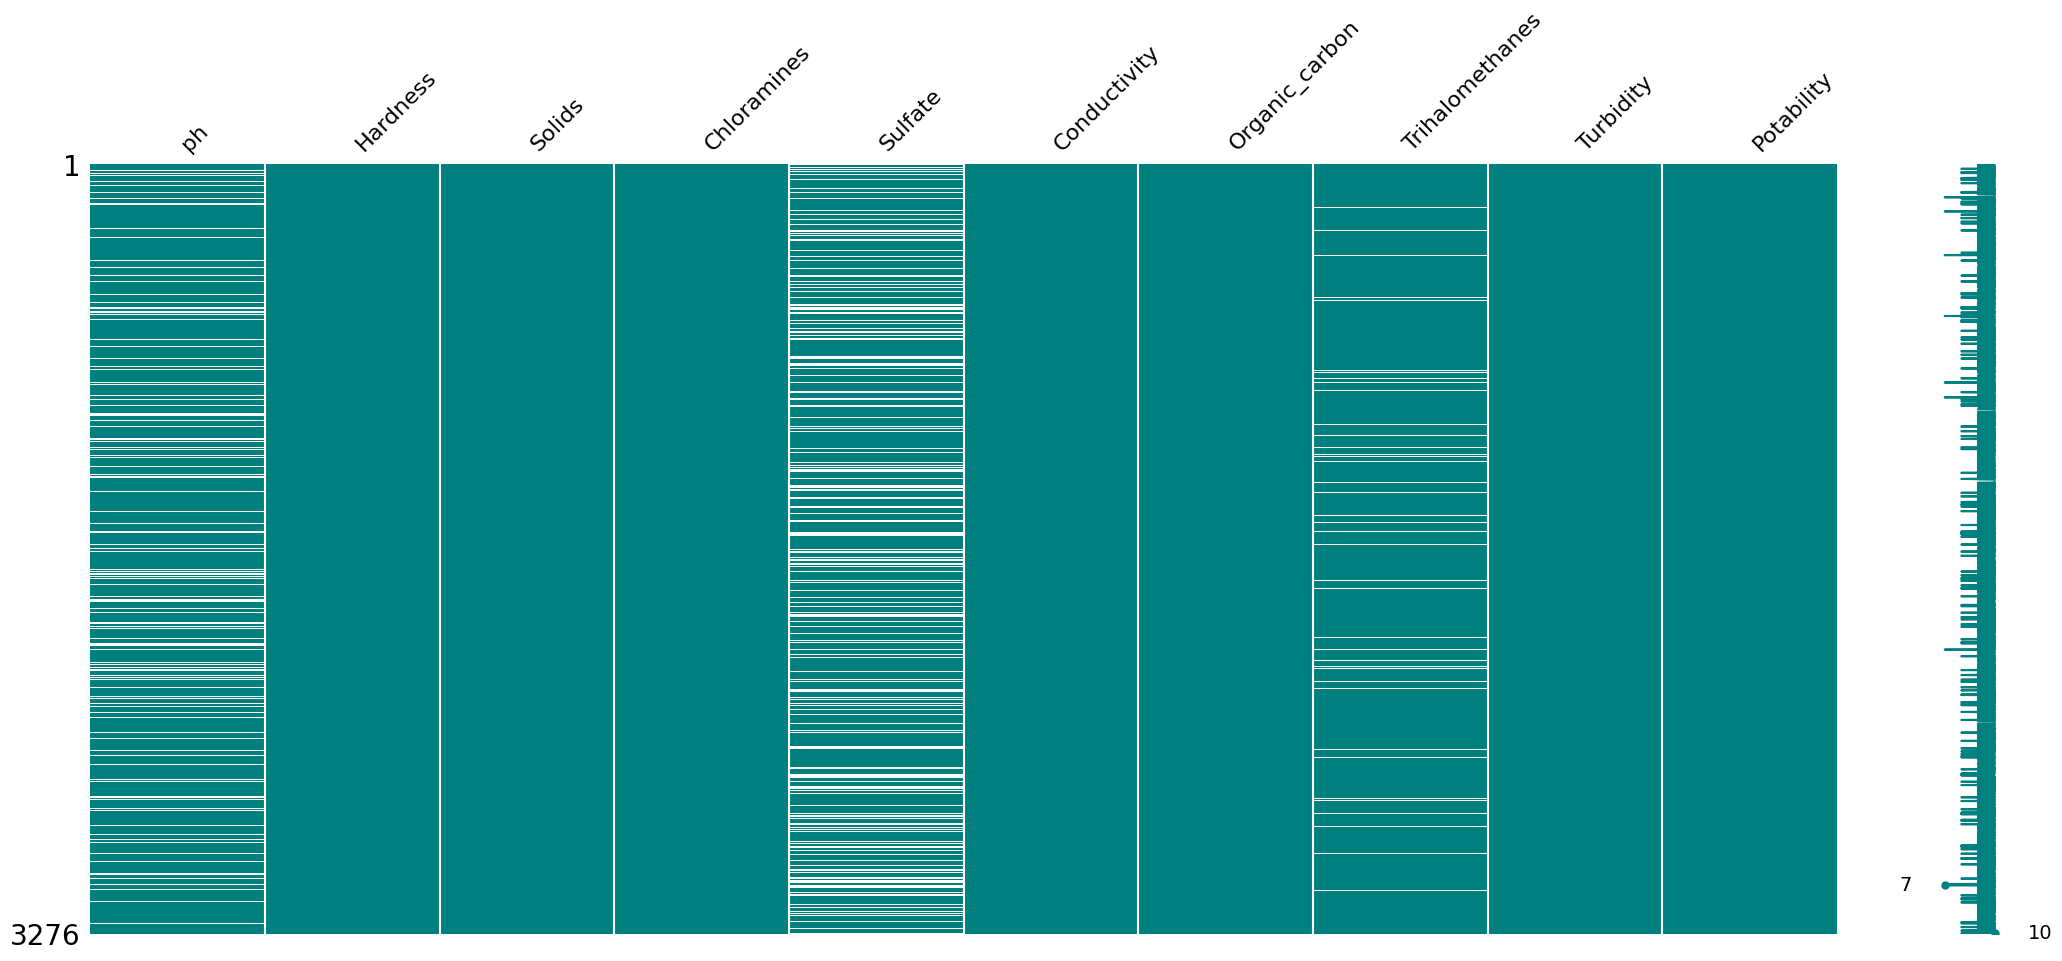

In [9]:
# Melakukan visualisasi data yang kosong
figures = msno.matrix(df, color=(0, 0.5, 0.5))

3.2.2 Distribusi kelas pada kolom dengan fitur kategori (Potability)

In [11]:
potability_data = pd.DataFrame(df['Potability'].value_counts())
figures = px.pie(data_frame=potability_data,
             values='Potability',
             names=['Not Potable','Potable'],
             hole=0.4,
             color_discrete_sequence=["#C2DEDC","#73BBC9"],
             labels={'label':'Potability','Potability':'No. Of Samples'})

figures.update_layout(font_family='Open Sans',
                      title=dict(text='Distribusi kelas pada kolom potability',
                                 x=0.49,
                                 y=0.95,
                                 font=dict(color="#333",size=20)),
                      hoverlabel=dict(bgcolor='white'))

figures.update_traces(textposition='outside', textinfo='percent+label')

figures.show()


3.2.3 Korelasi data antar kolom dengan fitur numerik

In [12]:
# Visualisasi matrix dari korelasi data
figures = px.scatter_matrix(data_frame=df, 
                            dimensions=df.drop('Potability',axis=1),
                            template='plotly_white',
                            color="Potability",
                            symbol="Potability",
                            color_discrete_sequence=["#FF7171","#9FD8DF"],
                            color_continuous_scale=["#FF7171","#9FD8DF"],
                            height=1500)

figures.update_layout(font_family='Open Sans',
                      font_size=10,
                      title=dict(text='Korelasi data antar kolom (fitur numerik) - Visualisasi Matrix',
                                 x=0.49,
                                 y=0.98,
                                 font=dict(color="#333",size=20)),
                      hoverlabel=dict(bgcolor='white'),
                      coloraxis_showscale=False)

figures.update_traces(diagonal_visible=False)

figures.show()

In [14]:
# Mempersiapkan dataframe korelasi data antar kolom
correlations_data=df.drop('Potability',axis=1).corr()
correlations_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000


In [16]:
# Visualisasi heatmap dari korelasi data
# semakin mendekati 1 semakin tinggi korelasi datanya
# semkain mendekati -1 semakin rendah korelasi datanya
figures = px.imshow(correlations_data,
                    color_continuous_scale=["#C2DEDC","#73BBC9"])

figures.update_layout(font_family='Open Sans',
                      font_size=10,
                      title=dict(text='Korelasi data antar kolom (fitur numerik) - Visualisasi Heatmap',
                                 x=0.49,
                                 y=0.98,
                                 font=dict(color="#333",size=20)),
                      hoverlabel=dict(bgcolor='white'))

figures.show()

# **4. Persiapan Data (Data Preparation)**

4.1 Mengatasi masalah data yang kosong dengan nilai rata-rata kolom (mean substitution)

In [17]:
# Rata-rata data pada kolom yang memiliki data kosong, dengan kondisi kolom Potability = 0
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.085378
Sulfate            334.564290
Trihalomethanes     66.303555
dtype: float64

In [18]:
# Rata-rata data pada kolom yang memiliki data kosong, dengan kondisi kolom Potability = 1
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.073783
Sulfate            332.566990
Trihalomethanes     66.539684
dtype: float64

In [19]:
# Rata-rata data pada kolom yang memiliki data kosong (data keseluruhan)
df[['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.080795
Sulfate            333.775777
Trihalomethanes     66.396293
dtype: float64

In [20]:
# Melakukan penggantian data kosong dengan nilai rata rata kolom 
# dan memasukkannya pada variabel df
df['ph'].fillna(value=df['ph'].mean(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].mean(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].mean(),inplace=True)

In [21]:
# Mengecek kembali nilai yang kosong pada dataset
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [22]:
# Mengecek total baris dan kolom dari dataset
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


4.2 Mengatasi masalah data tidak seimbang dengan resample

In [23]:
# Menghitung label dari kolom potability
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [24]:
# Memilih setiap labelnya
zero  = df[df['Potability']==0]
one = df[df['Potability']==1]

In [25]:
# Melakukan resample sehingga banyak data pada label = 1
# adalah 1988
df_minority_resampled = resample(one, replace = True, n_samples = 1998)

In [26]:
# Memasukan datanya pada dataframe
df = pd.concat([zero, df_minority_resampled])

In [27]:
# Menghitung label dari kolom potability
df.Potability.value_counts()

0    1998
1    1998
Name: Potability, dtype: int64

4.3 Melakukan pembagian data pada dataset dengan train_test_split

In [28]:
X = df.drop('Potability',axis=1).values
y = df['Potability'].values

In [29]:
# Melakukan pembagian data dengan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=404, stratify=y)

In [30]:
# Mengecek jumlah baris pada data latih dan data 
print(X_train.shape)
print(X_test.shape)

(3196, 9)
(800, 9)


4.4 Mengatasi data pencilan pada data latih dengan metode LOF (Local Outlier Factor)

In [31]:
# Inisialisasi fungsi LocalOutlierFactor
lof = LocalOutlierFactor().fit_predict(X_train)

In [32]:
# Memilih semua baris yang bukan outlier
# Memasukannya kembali kedalam dataset
mask = lof != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [33]:
X_train.shape

(3171, 9)

4.5 Standarisasi nilai data pada fitur numerik dengan MinMaxScaler

In [34]:
# Inisialisasi fungsi MinMaxScaler
scaler = MinMaxScaler()

In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Melihat sampel hasil standarisasi data
print(f"{X_train[0:3]} \n")
print(X_test[0:3])

[[0.55932911 0.61435159 0.33370996 0.47506956 0.46017717 0.42005893
  0.56216074 0.4475651  0.39734695]
 [0.46506112 0.65366661 0.25714121 0.57036063 0.70590998 0.48851608
  0.37873662 0.41862922 0.52478888]
 [0.74393172 0.44456413 0.66118476 0.46545609 0.55377754 0.60586686
  0.65731192 0.35993264 0.52167451]] 

[[0.57291922 0.47587537 0.39493578 0.55595572 0.58304807 0.47043817
  0.10601002 0.58061056 0.37665367]
 [0.55472246 0.61090005 0.4446592  0.59100669 0.62050019 0.54681346
  0.50824737 0.56276747 0.55774292]
 [0.50577104 0.42879816 0.70265524 0.39817747 0.35236553 0.67283987
  0.46726125 0.63385686 0.60421472]]


In [37]:
# Mengecek jumlah baris pada data latih dan data 
print(X_train.shape)
print(X_test.shape)

(3171, 9)
(800, 9)


5. Pembuatan Model

5.1 Model Baseline dengan Algoritma K-Nearest Neighbors¶

In [38]:
# Pembuatan model baseline
baseline_model = KNeighborsClassifier()
baseline_model.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
# Pengujian model terhadap data test
y_pred = baseline_model.predict(X_test)

In [40]:
# Laporan hasil klasifikasi model baseline
baseline_report = classification_report(y_test, y_pred, output_dict=True, target_names=['Not Potable',"Potable"])
pd.DataFrame(baseline_report).transpose()

,precision,recall,f1-score,support
Not Potable,0.652605,0.65750,0.655044,400.00000
Potable,0.654912,0.65000,0.652447,400.00000
accuracy,0.653750,0.65375,0.653750,0.65375
macro avg,0.653759,0.65375,0.653745,800.00000
weighted avg,0.653759,0.65375,0.653745,800.00000


In [41]:
# Menyimpan hasil prediksi untuk confussion matrix
baseline_cf = confusion_matrix(y_test, y_pred)

5.2 Pengembangan Model K-Nearest Neighbors dengan Hyper Parameter Tuning menggunakan HalvingGridSearchCV

In [42]:
# Hyperparameter yang akan di tuning
param_grid = {'n_neighbors': [1, 2],
              'p': [1, 2],
              'weights': ["uniform","distance"],
              'algorithm':["ball_tree", "kd_tree", "brute"],
              }

In [43]:
# Pencarian parameter terbaik dengan HalvingGridSearchCV
new_param = HalvingGridSearchCV(baseline_model, 
                                param_grid, 
                                cv=StratifiedKFold(n_splits=4, random_state=404, shuffle=True),
                                resource='leaf_size',
                                max_resources=20,
                                scoring='accuracy',
                                aggressive_elimination=True).fit(X_train, y_train)

In [44]:
# Hasil hyperparameter tuning dengan skor terbaik yang di dapatkan
print(f"Best parameter {new_param.best_estimator_} with score {new_param.best_score_}")

Best parameter KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=1) with score 0.7218532264638822


In [45]:
# Penerapan hyperparameter pada model baseline
model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=3, n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=3, n_neighbors=1)

In [46]:
# Pengujian model terhadap data test
y_pred = model.predict(X_test)

In [47]:
# Laporan hasil klasifikasi model baseline
improvement_report = classification_report(y_test, y_pred, output_dict=True, target_names=['Not Potable',"Potable"])
pd.DataFrame(improvement_report).transpose()

,precision,recall,f1-score,support
Not Potable,0.776081,0.76250,0.769231,400.00000
Potable,0.766585,0.78000,0.773234,400.00000
accuracy,0.771250,0.77125,0.771250,0.77125
macro avg,0.771333,0.77125,0.771232,800.00000
weighted avg,0.771333,0.77125,0.771232,800.00000


In [48]:

# Menyimpan hasil prediksi untuk confussion matrix
improvement_cf = confusion_matrix(y_test, y_pred)

6. Evaluasi Model

6.1 Perbandingan metriks antara model baseline dengan model yang dikembangkan

In [49]:
# Memasukkan hasil laporan klasifikasi model pada dataframe
metrics = pd.DataFrame({'accuracy' : [baseline_report['accuracy'], improvement_report['accuracy']],
                        'f1-score_0' : [baseline_report['Not Potable']['f1-score'],improvement_report['Not Potable']['f1-score']],
                        'precision_0' : [baseline_report['Not Potable']['precision'],improvement_report['Not Potable']['precision']],
                        'recall_0' : [baseline_report['Not Potable']['recall'],improvement_report['Not Potable']['recall']],
                        'f1-score_1' : [baseline_report['Potable']['f1-score'],improvement_report['Potable']['f1-score']],
                        'precision_1' : [baseline_report['Potable']['precision'],improvement_report['Potable']['precision']],
                        'recall_1' : [baseline_report['Potable']['recall'],improvement_report['Potable']['recall']]},
                        index=['Model Baseline','Model yang Dikembangkan'])
multiheader = [('','accuracy'),
               ('Not Potable', 'f1-score'),
               ('Not Potable', 'precision'),
               ('Not Potable', 'recall'),
               ('Potable', 'f1-score'),
               ('Potable', 'precision'),
               ('Potable', 'recall')]
metrics.columns = pd.MultiIndex.from_tuples(multiheader)
# Menampilkan dataframe
metrics

Not Potable                     Potable  \
                        accuracy    f1-score precision  recall  f1-score   
Model Baseline           0.65375    0.655044  0.652605  0.6575  0.652447   
Model yang Dikembangkan  0.77125    0.769231  0.776081  0.7625  0.773234   

                                          
                        precision recall  
Model Baseline           0.654912   0.65  
Model yang Dikembangkan  0.766585   0.78

6.2 Confussion Matrix

In [50]:
# Visualisasi hasil prediksi model baseline
figures = px.imshow(baseline_cf,
                    labels=dict(x="Label 1", y="Label 2", color="Terprediksi"),
                    x=['Not Potable', 'Potable'],
                    y=['Not Potable', 'Potable'],
                    color_continuous_scale=["#FF7171","#9FD8DF"])

figures.update_layout(font_family='Open Sans',
                      font_size=10,
                      title=dict(text='Confussion Matrix - Model Baseline',
                                 x=0.49,
                                 y=0.98,
                                 font=dict(color="#333",size=20)),
                      hoverlabel=dict(bgcolor='white'),
                      coloraxis_showscale=False
                      )
figures.show()

In [51]:
# Visualisasi hasil prediksi model yang dikembangkan
figures = px.imshow(improvement_cf,
                    labels=dict(x="Label 1", y="Label 2", color="Terprediksi"),
                    x=['Not Potable', 'Potable'],
                    y=['Not Potable', 'Potable'],
                    color_continuous_scale=["#FF7171","#9FD8DF"])

figures.update_layout(font_family='Open Sans',
                      font_size=10,
                      title=dict(text='Confussion Matrix - Model yang dikembangkan',
                                 x=0.49,
                                 y=0.98,
                                 font=dict(color="#333",size=20)),
                      hoverlabel=dict(bgcolor='white'),
                      coloraxis_showscale=False)
figures.show()

**Penutupan**
 Akses ke air minum merupakan hal penting bagi manusaia.Penerapan model ini untuk memprediksi data air yang layak dikonsumsi berdasarkan pH,Hardness,Solids,Chloramines dan lainnya.Dimana akan berdampak pada kesehatan manusia.

Referensi

Dokummentasi scikit-lear : https://scikit-learn.org/stable/
Dokumentasi Kaggel : https://www.kaggle.com/adityakadiwal/water-potability
Dokumentasi Plotly : https://plotly.com/python/